<a href="https://colab.research.google.com/github/gabey14/Deep-Learning-Notebooks/blob/master/Neural_Network_For_Handwritten_Digits_Classification_%7C_Deep_Learning_With_Hidden_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
 X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

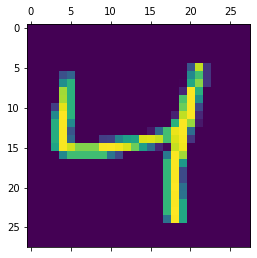

In [27]:
 plt.matshow(X_train[2])

In [12]:
y_train[2]

4

In [13]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
X_train.shape

(60000, 28, 28)

In [28]:
# scale the data
X_train = X_train/255
X_test = X_test/255

X_train[0]


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
# flatten the dataset convert 28*29 into 784

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [30]:
X_train_flattened.shape
X_test_flattened.shape


(10000, 784)

In [31]:
 X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [32]:
model = keras.Sequential([
         keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4696 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3038 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2842 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2738 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9259


In [33]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2663 - accuracy: 0.9249


[0.2663077712059021, 0.9248999953269958]

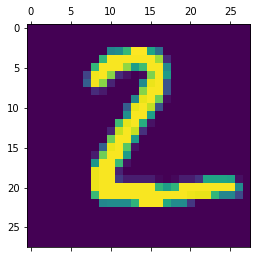

In [46]:
plt.matshow(X_test[1])

In [37]:
y_predicted = model.predict(X_test_flattened)

In [42]:
y_predicted[1]

array([2.8288653e-01, 8.5057616e-03, 9.9914593e-01, 3.0413777e-01,
       4.9131060e-10, 8.7203687e-01, 8.6534560e-01, 2.9258280e-12,
       1.3629106e-01, 2.3929920e-09], dtype=float32)

In [43]:
np.argmax(y_predicted[1])

2

In [48]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [49]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [50]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 953,    0,    2,    2,    0,    8,    8,    3,    3,    1],
       [   0, 1120,    2,    2,    0,    1,    4,    2,    4,    0],
       [   3,   11,  923,   18,    7,    3,   13,   11,   38,    5],
       [   2,    1,   20,  910,    0,   34,    2,   14,   21,    6],
       [   0,    2,    4,    2,  897,    1,   12,    6,   11,   47],
       [   7,    2,    4,   30,    8,  787,   13,    6,   29,    6],
       [   8,    3,    6,    1,    7,   14,  915,    2,    2,    0],
       [   1,    6,   24,    4,    4,    0,    0,  960,    2,   27],
       [   4,   14,    5,   22,    8,   29,   10,   14,  859,    9],
       [   8,    7,    2,    9,   16,    7,    0,   27,    8,  925]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

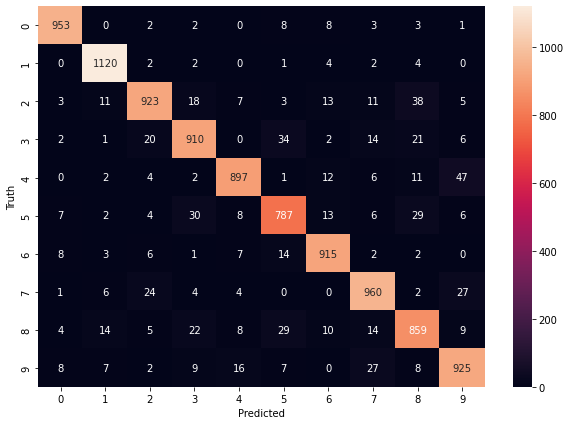

In [51]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
model = keras.Sequential([
         keras.layers.Dense(150,input_shape=(784,),activation='relu'),
         keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2484 - accuracy: 0.9280
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1093 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0750 - accuracy: 0.9771
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0554 - accuracy: 0.9827
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9874


In [60]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9761


[0.07509534806013107, 0.9761000275611877]

Text(69.0, 0.5, 'Truth')

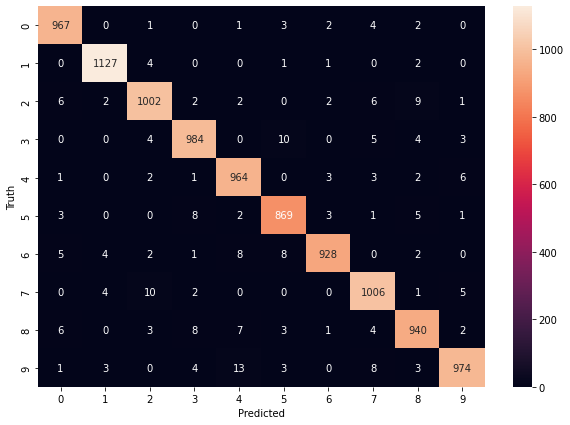

In [61]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
model = keras.Sequential([
         keras.layers.Flatten(input_shape=(28,28)),
         keras.layers.Dense(150,activation='relu'),
         keras.layers.Dense(10,activation='sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2519 - accuracy: 0.9263
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1091 - accuracy: 0.9681
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0535 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9869
